In [1]:

# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

In [2]:
# VAMOS A VER ALGUNOS MÉTODOS DE VISUALIZACIÓN QUE NO CONOCIAMOS:

# establece el estilo del fondo de las gráficas como "whitegrid". Las gráficas tendrán un fondo blanco con líneas de cuadrícula horizontales y verticales.
sns.set_style("whitegrid")

# cambiará el esquema de colores predeterminado de Seaborn a uno más oscuro, adecuado para gráficas con fondos claros. 
sns.set_theme(style="dark")

# establece el estilo en Solarize_Lihgt2. 
plt.style.use('Solarize_Light2')

In [5]:
df_final= pd.read_csv("df_final.csv", index_col = 0)
df_final.sample(10)

,loyalty_number,country,province,city,postal_code,gender,education,marital_status,loyalty_card,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,salary
146303,731254,Canada,New Brunswick,Fredericton,E3B 2H2,Male,College,Divorced,Star,Standard,2018,9,NaN,NaN,2017,9,0,0,0,0,0,0,0.0,79461.0
147340,785223,Canada,British Columbia,Vancouver,V6E 3Z3,Male,Bachelor,Married,Nova,Standard,2016,6,NaN,NaN,2017,9,5,5,10,2330,233,0,0.0,46700.0
217124,922388,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,Bachelor,Married,Star,Standard,2016,12,NaN,NaN,2018,1,4,0,4,412,41,0,0.0,91236.0
315782,795820,Canada,Alberta,Calgary,T3E 2V9,Female,College,Divorced,Aurora,Standard,2017,1,NaN,NaN,2018,7,14,0,14,3192,319,0,0.0,56629.0
80986,679607,Canada,Ontario,Toronto,P1W 1K4,Male,High School or Below,Married,Star,Standard,2014,7,NaN,NaN,2017,1,3,3,6,2898,289,453,37.0,55043.0
373097,262508,Canada,Ontario,Toronto,M1R 4K3,Male,Bachelor,Married,Star,Standard,2017,9,NaN,NaN,2018,11,12,5,17,2890,289,0,0.0,60563.0
101354,128039,Canada,Saskatchewan,Regina,S1J 3C5,Male,Bachelor,Married,Star,Standard,2014,9,NaN,NaN,2017,7,0,0,0,0,0,0,0.0,94052.0
101374,128789,Canada,Alberta,Edmonton,T9G 1W3,Female,Master,Married,Star,Standard,2015,1,NaN,NaN,2017,7,5,0,5,2155,215,0,0.0,127574.0
73385,432370,Canada,Ontario,Toronto,P1W 1K4,Male,Bachelor,Married,Star,Standard,2012,6,NaN,NaN,2017,5,5,3,8,3048,304,0,0.0,76396.0
171646,288735,Canada,Quebec,Hull,J8Y 3Z5,Female,Bachelor,Married,Aurora,Standard,2016,6,NaN,NaN,2017,11,0,0,0,0,0,0,0.0,52659.0


Text(0, 0.5, 'Cantidad de vuelos reservados')

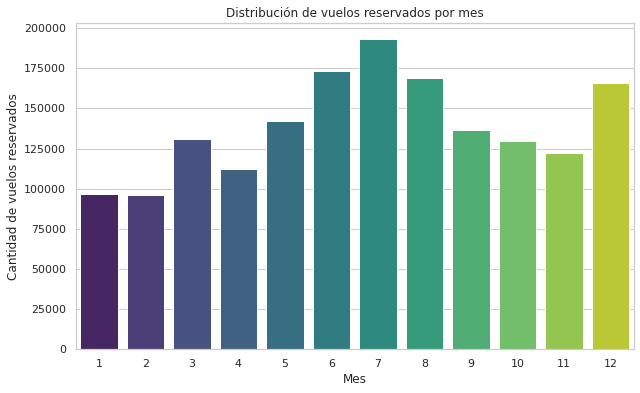

In [7]:
# 1 ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
#Utilizo un gráfico de barras y agrupo por meses para ver el numero de vuelos por mes siendo los meses de verano y navidad cuando más reservas
#se hacen

# Agrupar por mes y contar la cantidad de vuelos reservados
vuelos_al_mes = df_final.groupby('month')['flights_booked'].sum().reset_index() #para tener la agrupacion month como columna y poder ponerla en el eje x

# Configurar el estilo de seaborn
sns.set(style="whitegrid") 

# Crear el gráfico de barras
plt.figure(figsize=(10, 6)) #tamaño
sns.barplot(x='month', y='flights_booked', data=vuelos_al_mes, palette='viridis')
plt.title('Distribución de vuelos reservados por mes') #titulo de la grafica
plt.xlabel('Mes') #titulo eje x
plt.ylabel('Cantidad de vuelos reservados')#titulo eje y

Text(0, 0.5, 'Puntos')

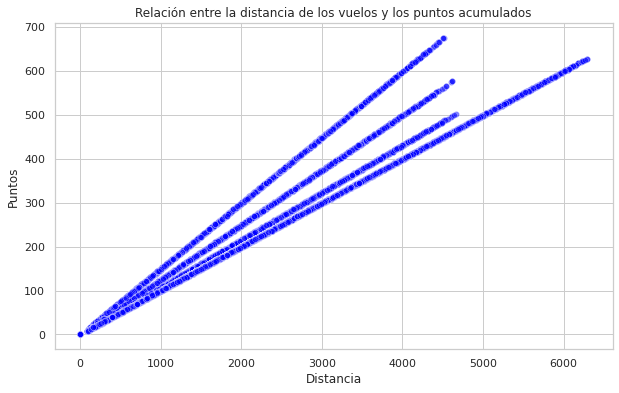

In [8]:
# 2 ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?
#cuanto mayor es la distancia de los vuelos, mayor es el número de puntos que acumulan los clientes
sns.set(style="whitegrid")

#gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance', y='points_accumulated', data=df_final, alpha=0.5, color='blue') #transparencia para que se vean los puntos que se superponen
plt.title('Relación entre la distancia de los vuelos y los puntos acumulados')
plt.xlabel('Distancia')
plt.ylabel('Puntos')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Ontario'),
  Text(1, 0, 'British Columbia'),
  Text(2, 0, 'Quebec'),
  Text(3, 0, 'Alberta'),
  Text(4, 0, 'Manitoba'),
  Text(5, 0, 'New Brunswick'),
  Text(6, 0, 'Nova Scotia'),
  Text(7, 0, 'Saskatchewan'),
  Text(8, 0, 'Newfoundland'),
  Text(9, 0, 'Yukon'),
  Text(10, 0, 'Prince Edward Island')])

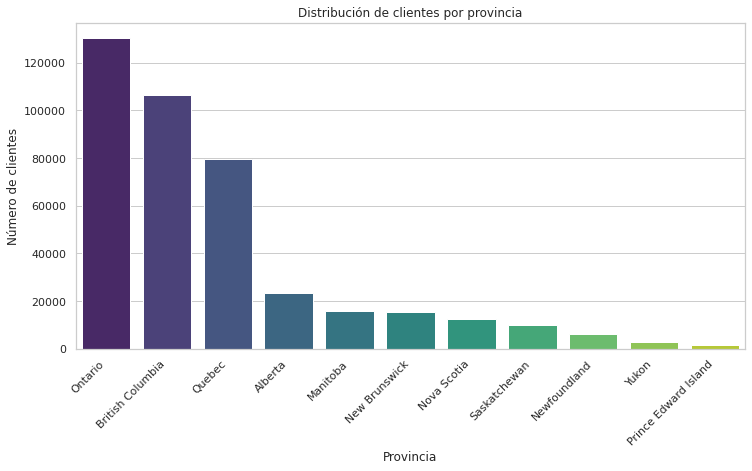

In [9]:
# 3 ¿Cuál es la distribución de los clientes por provincia o estado?
#la mayor concentración de clientes está en Ontario, British Columbia y Quebec

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.countplot(x='province', data=df_final, palette='viridis', order=df_final['province'].value_counts().index)
plt.title('Distribución de clientes por provincia')
plt.xlabel('Provincia')
plt.ylabel('Número de clientes')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mayor legibilidad y en horizontal

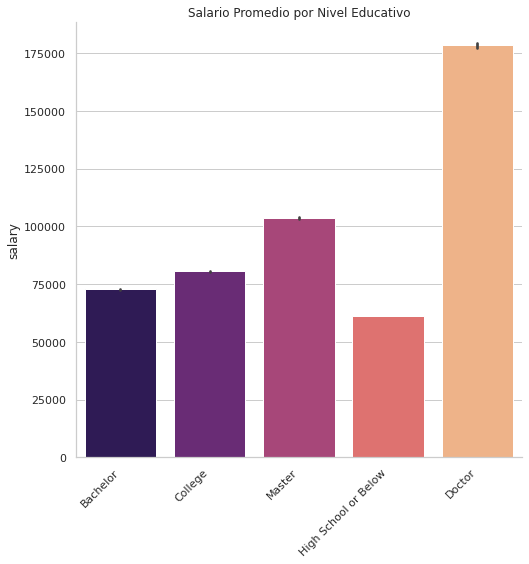

In [10]:
#4 ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
#cuanto mas nivel educativo mayor salario

fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x = "education", y = "salary", data = df_final, palette = "magma")
plt.title('Salario Promedio por Nivel Educativo')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.gca().spines['right'].set_visible(False) # quitamos la línea de la derecha
plt.gca().spines["top"].set_visible(False) # quitamos la línea de arriba;

Text(0.5, 1.0, 'Proporción de Clientes por Tipo de Tarjeta de Fidelidad')

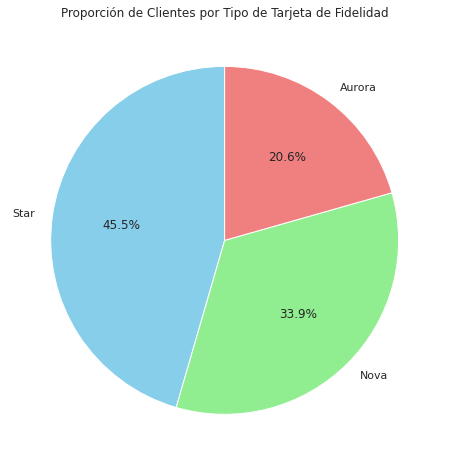

In [11]:
#5 ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?
# Casi la mitad de los clientes utilizan la tarjeta Star
loyalty_card = df_final['loyalty_card'].value_counts()

#gráfico de reparto
plt.figure(figsize=(8, 8))
plt.pie(loyalty_card, labels=loyalty_card.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Proporción de Clientes por Tipo de Tarjeta de Fidelidad')

(0.0, 140000.0)

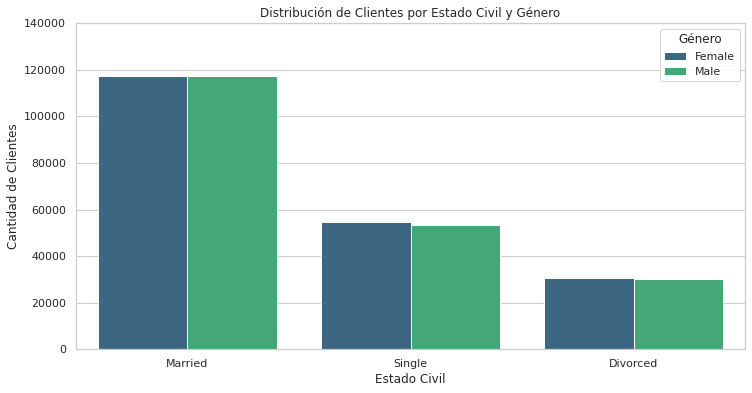

In [12]:
#6 # ¿Cómo se distribuyen los clientes según su estado civil y género?
#no hay diferencia dentro de casados, solteros o divorciados entre mujeres y hombres. pero vemos que la mayoria de los clientes son casads
plt.figure(figsize=(12, 6))
sns.countplot(x='marital_status', hue='gender', data=df_final, palette='viridis')
plt.title('Distribución de Clientes por Estado Civil y Género')
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Género')
plt.ylim(0, 140000)